BERT

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [34]:
# Load your BERT embeddings data
df = pd.read_csv("D:/code-python/CPC/NVIDIA-Stock-prediction/embedding/BERT_Embedding.csv")
data = df.drop('timestamp', axis=1)

In [35]:
# Dimensionality reduction for visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

In [36]:
number_of_outliers = []
percentage_of_outliers = []
min_samples = 2 * tsne_results.shape[1]

for eps in np.linspace(0.001, 3, 50):
    dbscan = DBSCAN (eps = eps, min_samples=min_samples)
    dbscan.fit(tsne_results)

    number_of_outliers.append(np.sum(dbscan.labels_==-1))

    perc_outliers = 100 * np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
    percentage_of_outliers.append(perc_outliers)

Text(0, 0.5, 'Percentage of Outliers')

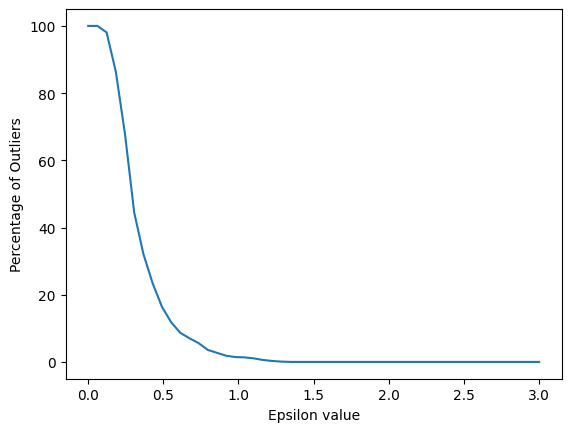

In [37]:
sns.lineplot(x = np.linspace(0.001, 3, 50), y = percentage_of_outliers);

plt.xlabel('Epsilon value')
plt.ylabel('Percentage of Outliers')

In [38]:
min_samples = 2 * tsne_results.shape[1]
dbscan = DBSCAN(eps = 2.0, min_samples=min_samples)

In [39]:
dbscan.fit(tsne_results)

DBSCAN(eps=2.0, min_samples=4)

In [40]:
dbscan.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [41]:
df_BERT_dbscan = pd.DataFrame(data=tsne_results, columns=['Component 1', 'Component 2'])

In [42]:
df_BERT_dbscan['Labels'] = dbscan.labels_

<Axes: xlabel='Component 1', ylabel='Component 2'>

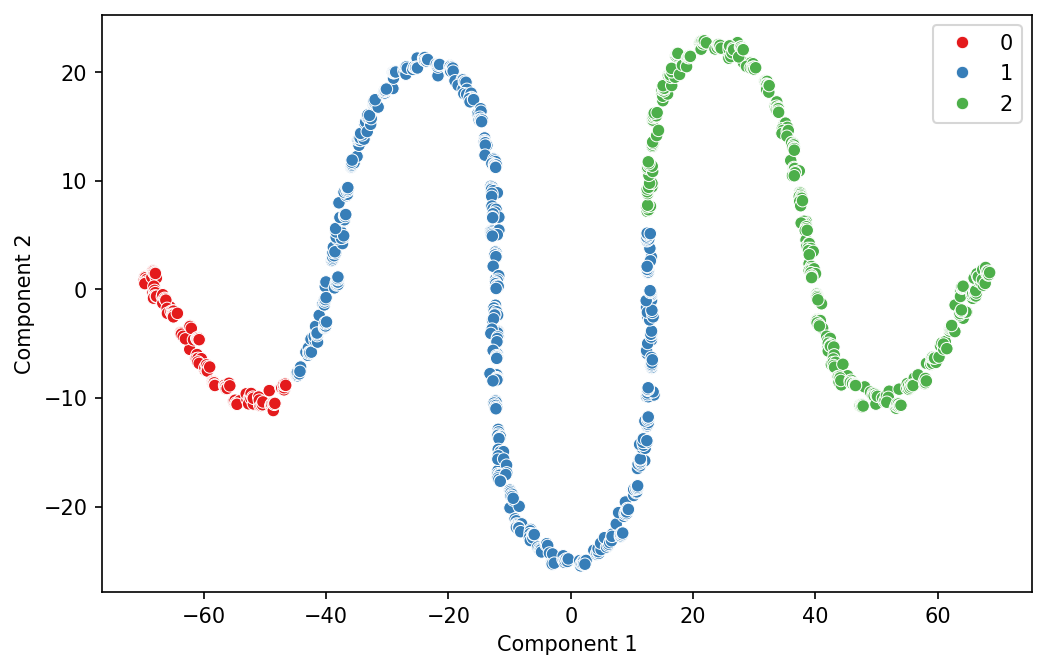

In [43]:
plt.figure(figsize=(8,5), dpi = 150)
sns.scatterplot(data = df_BERT_dbscan, x = 'Component 1', y = 'Component 2', hue = dbscan.labels_, palette = 'Set1')

In [44]:
from sklearn.metrics import silhouette_score


In [45]:
# Calculate silhouette score
silhouette_avg = silhouette_score(tsne_results, dbscan.labels_)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.411


In [46]:
df_BERT_dbscan

,Component 1,Component 2,Labels
0,-69.681122,1.132741,0
1,-69.759148,0.894287,0
2,-69.569687,1.072330,0
3,-69.581680,0.814732,0
4,-69.320175,0.933718,0
...,...,...,...
1032,68.274063,1.328434,2
1033,68.086388,1.666574,2
1034,68.246284,1.662802,2
1035,68.372017,1.366548,2
